# Automated Loan Approval & Product Cross Selling
## *Machine Learning (Regression and Clustering)*
### *Mini Project 2*
> Author: Ng Soo Kuan

### **Business Problems and Understanding**

- A Fintech company launched mobile app and provide the services for customers to deposit money, buy investment/finance products, payment, loan, … etc.
- Fintech company want offer loan services for customers but it spending time and resources for every loan approval even at small amount. Speed up and minimize the resources is needed.
- Based on the transaction data from customers, Fintech company plan to cross selling some other products to existing customers. They need to implement marketing campaign on targeted customers.

### **Data Understanding**
#### *The transactional data provide the opportunities to create machine learning model to predict the credit_score to automate the loan approval. Customer segmentation for cross selling the investment products to targeted customers.*

- **user_id:** Unique user identifier
- **age:** Age of individual (18–70)
- **gender:** Gender (Male/Female/Other)
- **education_level:** Highest education level
- **employment_status:** Employment type (e.g. Employed, Student)
- **job_title:** Job title or role
- **monthly_income_usd:** Approx. monthly income in USD
- **monthly_expenses_usd:** Approx. monthly expenses in USD
- **savings_usd:** Total savings
- **has_loan:** Whether individual has a loan (Yes/No)
- **loan_type:** Type of loan (if any)
- **loan_amount_usd:** Loan principal amount
- **loan_term_months:** Duration of loan
- **monthly_emi_usd:** Monthly installment (EMI)
- **loan_interest_rate_pct:** Interest rate on loan (%)
- **debt_to_income_ratio:** Ratio of debt payments to income
- **credit_score:** Synthetic credit score (300–850)
- **savings_to_income_ratio:** Ratio of savings to annual income
- **region:** Geographic region
- **record_date:** Record creation date

### *1. Import the Libraries*

In [5]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from string import ascii_letters
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

In [7]:
# Set the default figure size
plt.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

### *2. Import the data*

In [10]:
# Import the dataset
df = pd.read_csv('synthetic_personal_finance_dataset.csv', index_col = False)
print(df.head())

  user_id  age  gender education_level employment_status    job_title  \
0  U00001   56  Female     High School     Self-employed  Salesperson   
1  U00002   19  Female             PhD          Employed  Salesperson   
2  U00003   20  Female          Master          Employed      Teacher   
3  U00004   25    Male             PhD          Employed      Manager   
4  U00005   53  Female             PhD          Employed      Student   

   monthly_income_usd  monthly_expenses_usd  savings_usd has_loan  loan_type  \
0             3531.69               1182.59    367655.03       No        NaN   
1             3531.73               2367.99    260869.10      Yes  Education   
2             2799.49               1003.91    230921.21       No        NaN   
3             5894.88               4440.12    304815.51      Yes   Business   
4             5128.93               4137.61    461509.48       No        NaN   

   loan_amount_usd  loan_term_months  monthly_emi_usd  loan_interest_rate_pct  \

### *3. Exploratory Data Analysis*

In [13]:
# Check the Column and row size 
df.shape

(32424, 20)

In [15]:
# Check the data type and whether missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  32424 non-null  object 
 1   age                      32424 non-null  int64  
 2   gender                   32424 non-null  object 
 3   education_level          32424 non-null  object 
 4   employment_status        32424 non-null  object 
 5   job_title                32424 non-null  object 
 6   monthly_income_usd       32424 non-null  float64
 7   monthly_expenses_usd     32424 non-null  float64
 8   savings_usd              32424 non-null  float64
 9   has_loan                 32424 non-null  object 
 10  loan_type                12995 non-null  object 
 11  loan_amount_usd          32424 non-null  float64
 12  loan_term_months         32424 non-null  int64  
 13  monthly_emi_usd          32424 non-null  float64
 14  loan_interest_rate_pct

In [17]:
# Check the details of numerical & integer value
df.describe()

,age,monthly_income_usd,monthly_expenses_usd,savings_usd,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio
count,32424.000000,32424.000000,32424.000000,3.242400e+04,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000
mean,43.415865,4027.863185,2419.444709,2.437520e+05,100114.735992,58.500000,3092.992339,6.616332,1.194881,575.260424,5.045431
std,14.978246,1916.773353,1388.893084,1.915772e+05,152536.588635,104.865373,6478.939776,9.472964,3.761964,159.023227,2.851344
min,18.000000,500.000000,150.010000,6.359600e+02,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.100000
25%,30.000000,2657.795000,1397.497500,8.629155e+04,0.000000,0.000000,0.000000,0.000000,0.000000,437.000000,2.580000
50%,43.000000,3997.740000,2219.575000,2.017003e+05,0.000000,0.000000,0.000000,0.000000,0.000000,575.000000,5.040000
75%,56.000000,5351.607500,3254.037500,3.589662e+05,189499.070000,60.000000,3574.567500,13.140000,0.920000,714.000000,7.510000
max,69.000000,12404.050000,10082.710000,1.237774e+06,499954.750000,360.000000,47723.840000,30.000000,90.670000,850.000000,10.000000


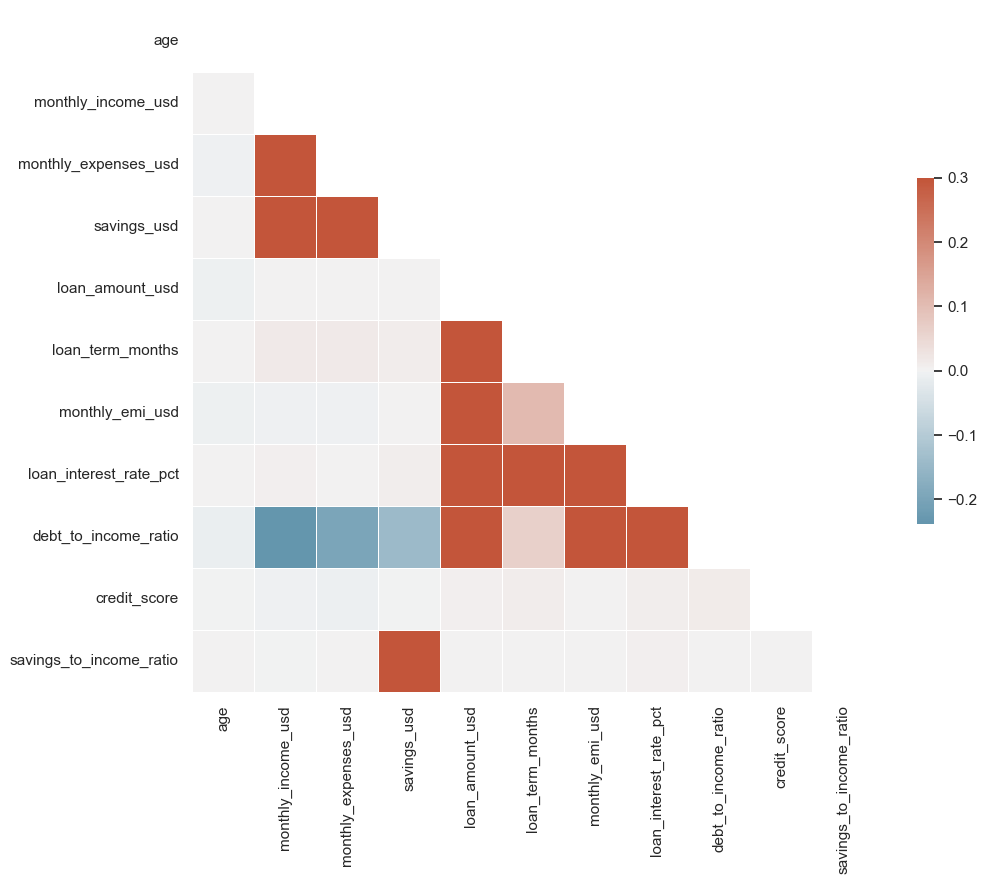

In [14]:
# Check the heatmap of correlation
sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df.select_dtypes(include='number').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### ***Note:*** Based on the correlation plot, the numerical predictor not correlated with credit_score. The scoring of the model may not be good. Need to combine with categorical variables to check on the model performance

In [20]:
# Check duplicated record
df.duplicated().sum()

0

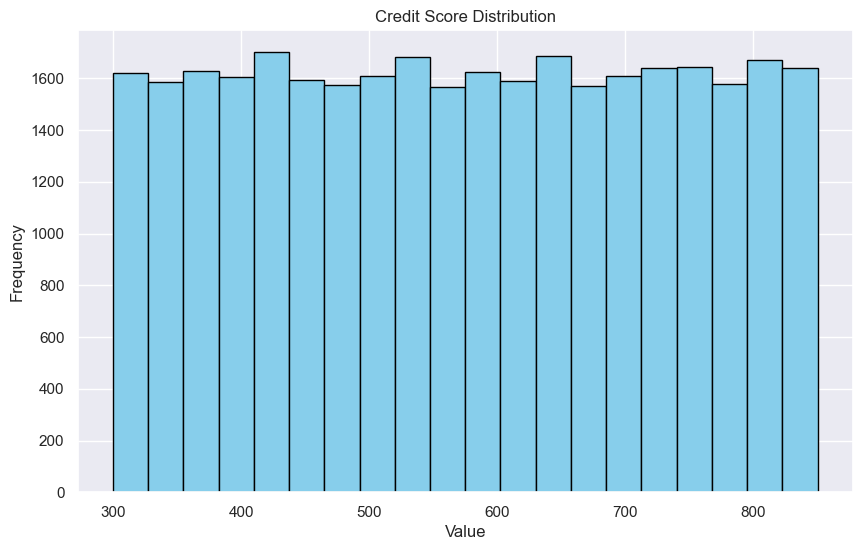

In [22]:
# Check the distribution of Credit Score (Histogram)
plt.hist(df['credit_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Credit Score Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

C:\Users\nsk_z\AppData\Local\Temp\ipykernel_10280\2895367011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='has_loan', data=df, palette='Set2')


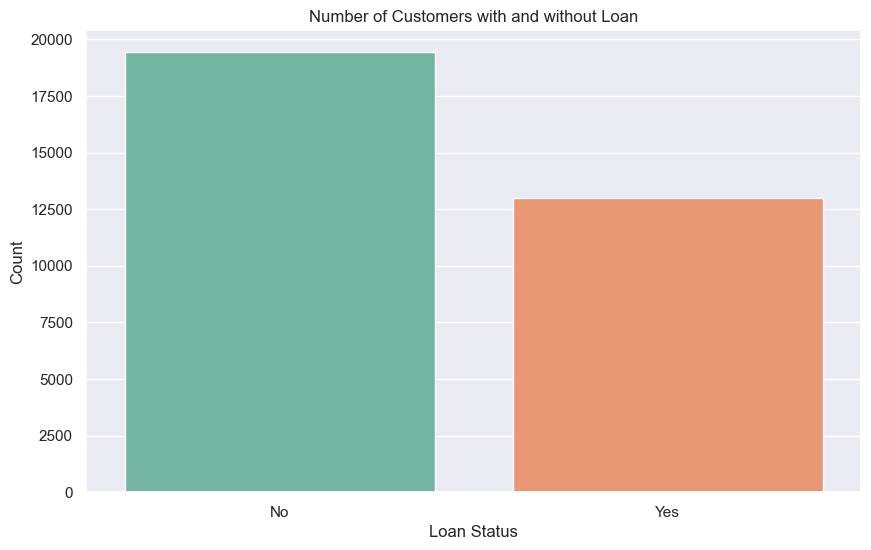

In [24]:
# Visualize quantity customer that the has loan and don't have loan 
sns.countplot(x='has_loan', data=df, palette='Set2')
plt.title('Number of Customers with and without Loan')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

### ***Note:*** Still got a lot of customers do not have loan

### *4. Data Transformation*

In [28]:
# Drop columns that not needed for modelling
# Drop user_id (Unique Identifier), record_date
df = df.drop(['user_id', 'record_date'], axis=1)
df.head()

,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region
0,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,NaN,0.00,0,0.00,0.00,0.00,430,8.68,Other
1,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,Education,146323.34,36,4953.50,13.33,1.40,543,6.16,North America
2,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,NaN,0.00,0,0.00,0.00,0.00,754,6.87,Africa
3,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,Business,93242.37,24,4926.57,23.93,0.84,461,4.31,Europe
4,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,NaN,0.00,0,0.00,0.00,0.00,516,7.50,Africa


In [30]:
# Set Target variable
y = df['credit_score']
y.head()

0    430
1    543
2    754
3    461
4    516
Name: credit_score, dtype: int64

In [32]:
# Set Predictor Variable
X = df.drop(columns=['credit_score'])
X.head()

,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,savings_to_income_ratio,region
0,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,NaN,0.00,0,0.00,0.00,0.00,8.68,Other
1,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,Education,146323.34,36,4953.50,13.33,1.40,6.16,North America
2,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,NaN,0.00,0,0.00,0.00,0.00,6.87,Africa
3,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,Business,93242.37,24,4926.57,23.93,0.84,4.31,Europe
4,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,NaN,0.00,0,0.00,0.00,0.00,7.50,Africa


### *5. Data Modelling*

In [35]:
# Split the dataset to train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.head()

,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,savings_to_income_ratio,region
23163,35,Female,Other,Employed,Unemployed,6705.49,3268.08,146953.38,Yes,Education,24870.35,12,2129.54,5.04,0.32,1.83,North America
5045,66,Female,Bachelor,Unemployed,Accountant,5588.73,4799.81,279452.44,No,NaN,0.00,0,0.00,0.00,0.00,4.17,Other
13583,36,Male,Master,Employed,Teacher,5895.36,3425.30,244078.18,No,NaN,0.00,0,0.00,0.00,0.00,3.45,Other
13658,36,Male,PhD,Self-employed,Driver,5272.78,2443.16,449638.22,Yes,Business,66389.14,120,1368.18,21.91,0.26,7.11,Africa
15289,50,Female,Bachelor,Self-employed,Unemployed,2116.32,1377.77,198900.63,No,NaN,0.00,0,0.00,0.00,0.00,7.83,Asia


In [39]:
y_train.head()

23163    651
5045     498
13583    464
13658    660
15289    603
Name: credit_score, dtype: int64

### *6. Multiple Linear Regression*

In [42]:
# Perform One Hot Encoding --> Scaling/Normalizing --> Model fitting
# Define preprocessing
numeric_features = ['age', 'monthly_income_usd', 'monthly_expenses_usd','savings_usd', 'loan_amount_usd', 'loan_term_months', 
                    'monthly_emi_usd', 'loan_interest_rate_pct', 'debt_to_income_ratio', 'savings_to_income_ratio']
categorical_features = ['gender', 'education_level', 'employment_status', 'job_title', 'has_loan', 'loan_type', 'region']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Combine into a pipeline
model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

# Fit only on train
model_pipeline.fit(X_train, y_train)

# Evaluate on test
score = model_pipeline.score(X_test, y_test)
print(score)

-0.0009943115899577748


### *6. Regularisation (RidgeCV)*

In [45]:
# Perform One Hot Encoding --> Scaling/Normalizing --> Model fitting
# Define preprocessing
numeric_features = ['age', 'monthly_income_usd', 'monthly_expenses_usd','savings_usd', 'loan_amount_usd', 'loan_term_months', 
                    'monthly_emi_usd', 'loan_interest_rate_pct', 'debt_to_income_ratio', 'savings_to_income_ratio']
categorical_features = ['gender', 'education_level', 'employment_status', 'job_title', 'has_loan', 'loan_type', 'region']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Combine into a pipeline
model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5))
])

# Fit only on train
model_pipeline.fit(X_train, y_train)

# Evaluate on test
score = model_pipeline.score(X_test, y_test)
print(score)

-0.0008647113533191142


### ***Note:*** Model only achieved -0.00086 R-squared, bad models to predict credit_score. 
#### *The reasons:*
- *Poor features or not enough features to predict*
- *Many noises or unrelated predictors*

## **Customer Segmentation**

In [49]:
## Create some supporting functions

# Create new centroids randomly for all the K clusters including all dimensions
def create_centroids(K, features):
    # start with No centroids
    centroids = []
    # need one centroid for each cluster
    for i in range(K):
        # it can be multi-dimensional
        dimensions = []
        for f in features:
            # create a random number between the minimum and maximum of each feature
            x = np.random.uniform(X[f].min(), X[f].max()) #
            dimensions.append(x)
        # add all dimensions for the centroids of each cluster
        centroids.append(dimensions)

    return centroids

In [51]:
# Segmentation on debt_to_income_ratio and savings_to_income_ratio
centroids = create_centroids(3, ['debt_to_income_ratio', 'savings_to_income_ratio'])
centroids

[[81.12195008521199, 7.711799235103312],
 [62.519598293554935, 1.3503555436927583],
 [43.57518836805267, 8.333769916274777]]

In [53]:
# Identify the closest centroid for a given data point
def closest_centroid(x, centroids):
    distances = []
    # convert x to a numpy.array; x contains all the features of a data point
    p = np.array(x)
    for c in centroids:
        # convert c to a numpy.array; c contains the coordinates for all the features
        q = np.array(c)
        # calculate the Euclidean distance between data point `x` and centroid `c`
        d = np.sqrt(np.square(p-q).sum())
        # Hint: consider that the data has been converted to NumPy Arrays
        # add the distance for each centroid
        distances.append(d)

    # return the position (cluster) which has the smallest distance
    return np.array(distances).argmin()

In [55]:
# recalculate all the centroids based on the mean of the members of each cluster
def update_centroid(X, y, centroids):
    c = []
    # for each of the existing centroids
    for i in range(len(centroids)):
        # check if any object was assigned to a cluster
        if X[y == i].shape[0]:
            dimensions = []
            # for all the features
            for f in X.columns:
                # calculate the mean
                x = X[f][y == i ].mean() #
                dimensions.append(x)
            c.append(dimensions)
        # if a cluster got no members
        else:
            # keep the previous coordinates
            c.append(centroids[i]) #

    return c

In [57]:
# plot a chart of the data points and centroids either generic or identifying the clusters
# NOTE: for visualisation purposes, only consider the first two features
def plot_data(ax, X, y, centroids, show_clusters = True):
    # unpack the coordinates of the centroids
    a = [z[0] for z in centroids]
    b = [z[1] for z in centroids]

    # show distinct colours if asked to identify the clusters
    if show_clusters:
        colours = 'rgbykcm'
        for i in range(len(centroids)):
            ax.scatter(X[features[0]][y == i], X[features[1]][y == i], c = colours[i], label = 'Cluster %d' % i)
    # show data points without cluster identification
    else:
        ax.scatter(X[features[0]], X[features[1]], label = 'Data Point')

    # label the features
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])

    # identify the centroids
    ax.scatter(a, b, c = 'k', linewidths = 5, marker = 'x', label = 'Centroid')
    for i in range(len(a)):
        c = colours[i] if show_clusters else 'k'
        ax.axvline(x = a[i], color = c, linestyle = '--', linewidth = 1)
        ax.axhline(y = b[i], color = c, linestyle = '--', linewidth = 1)

    # create a text to show the centroids' coordinates
    t = '\n'.join(['%d: (%.3f, %.3f)' % (i, a, b) for (i, (a, b)) in enumerate(centroids)])
    ax.text(7.2, 1, t)

    ax.legend()

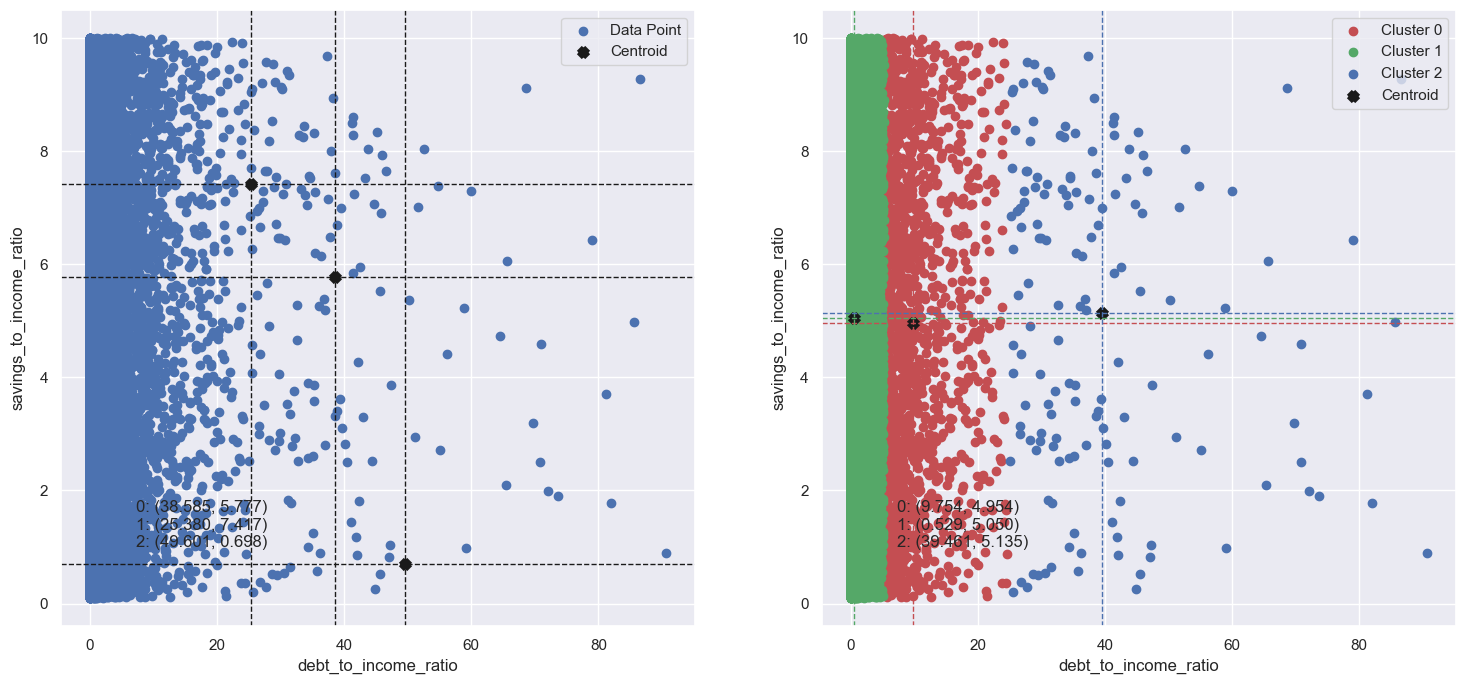

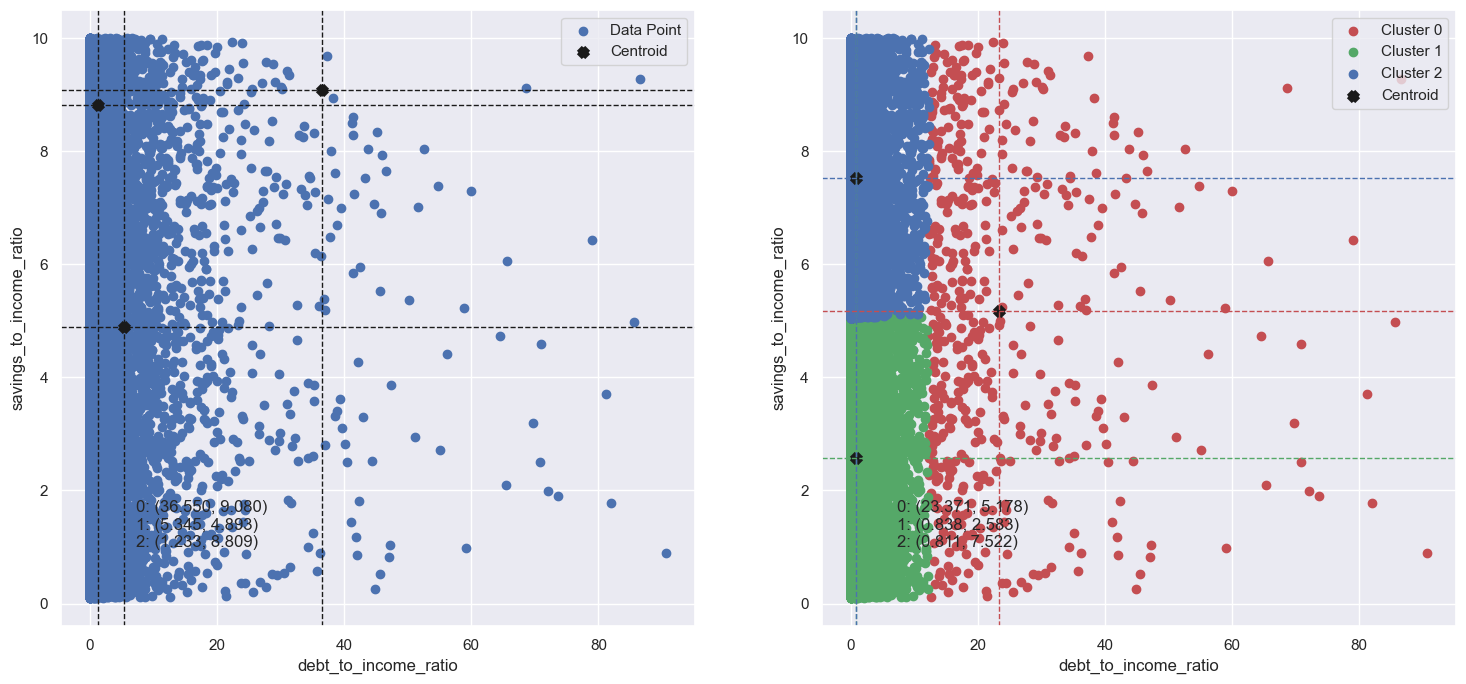

In [61]:
## K_Means
## Note that the comments match the outlined K-Means Algorithm in the presentation

# 1. Define the number of clusters `K`
K = 3

# list the features to be used
features = ['debt_to_income_ratio', 'savings_to_income_ratio']

# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features)
centroids_list = [centroids] # Create the initial centroids

# plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, False)

# repeat util makes no moves
while True:
    # 3. Calculate the distance between each data point and cluster centres
    # 4. Assign the data point to the cluster whose distance from its centre is minimum

    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis = 1).values # this can be a bit hardcore, think about it for a while
            # Hints: the `apply()` method with a `lambda` function and returning some value
            # Note: `for` loops are acceptable but slow

    # move the known assignment be the previous state, for post comparison
    old_c = centroids.copy()

    # 5. Recalculate all new cluster centres by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids) # Update the centroids

    # 6. Repeat steps 3 to 5 until the centroids do not change
    if old_c == centroids:
        break

# plot the data points identified by cluster and final centroids (the 'After')
plot_data(axes[1], X[features], y, centroids)
plt.show()

### ***Note:*** There are 2 suggested plot for cluster = 3. Pick the plot below:
#### *The clusters:*
- **Cluster 1:** low debt_to_income_ratio vs high savings_to_income_ratio
- **Cluster 2:** low debt_to_income_ratio vs low savings_to_income_ratio
- **Cluster 3:** high debt_to_income ratio vs high & low savings_to_income_ratio

#### *The strategy:*
- **Cluster 1:** Can cross sell the high risk investment product.
- **Cluster 2:** Can cross sell the low risk investment product.
- **Cluster 3:** Avoid and prevent to cross sell any high risk investment product. May encourage more deposit from this cluster first